In [1]:
#!pip install pysentiment2
#!pip install pycorenlp
#!pip install torch
#!pip install tranformers
import pandas as pd
import os
import pysentiment2 as ps
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import torch


In [2]:
from transformers import BertTokenizer, BertForSequenceClassification
from pycorenlp import StanfordCoreNLP

In [4]:
data = pd.read_csv('output1.csv')
data
data['label'].unique()
data

,Unnamed: 0,tokenized_text,label
0,0,results from the foodservice businesses in ref...,positive
1,1,"during 2020, a portion of what was previously ...",neutral
2,2,if the ongoing efforts to mitigate the impact ...,negative
3,3,the increase in our net cash and investments p...,neutral
4,4,the increased fourth quarter demand for retail...,positive
...,...,...,...
655,655,costs associated with intangibles that have no...,neutral
656,656,we define ebitda as operating profit plus depr...,neutral
657,657,it is not possible to estimate what effect thi...,neutral
658,658,for additional information on mortgage banking...,positive


In [5]:
def preprocessing2(data):
    data['wordcount'] = data["tokenized_text"].apply(lambda x: len(str(x).split(' ')))
    
    data['tokenized_text'] = data['tokenized_text'].str.replace('[^a-z]', ' ', regex=True).str.strip()

preprocessing2(data)

In [6]:
data= data[data['wordcount'] > 5]
data= data[data['wordcount'] <64]


In [7]:
def lm_calculation(data):
    length=[]
    positive_lm=[]
    negative_lm=[]
    lm=ps.LM()
    for i in data['tokenized_text']:
        tokens=lm.tokenize(i)
        positive_lm.append(lm.get_score(tokens)['Positive'])
        negative_lm.append(lm.get_score(tokens)['Negative'])
    data['positive_lm'] =positive_lm
    data['negative_lm'] =negative_lm
    data.rename(columns={1: 'label', 0:'text'}, inplace=True)
lm_calculation(data) 

In [8]:
def lm_classification(data):
    data['classification_lm']='positive'
    data.loc[data['positive_lm'] < data['negative_lm'], 'classification_lm'] ='negative'
    data.loc[data['negative_lm'] == data['positive_lm'],'classification_lm']='neutral'

lm_classification(data)

In [9]:
def accuracy(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_lm'])
print(accuracy(data))

0.48833333333333334


In [10]:
data['label'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [11]:
def confusion_matrix(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_lm'])
confusion_matrix(data)

array([[ 42,  32,   6],
       [119, 235,  82],
       [ 15,  53,  16]], dtype=int64)

In [12]:
data

,Unnamed: 0,tokenized_text,label,wordcount,positive_lm,negative_lm,classification_lm
0,0,results from the foodservice businesses in ref...,positive,46,0,1,negative
1,1,during a portion of what was previously ...,neutral,33,0,0,neutral
4,4,the increased fourth quarter demand for retail...,positive,29,0,0,neutral
5,5,contractual cash obligations as of december ...,neutral,24,0,0,neutral
6,6,our actual results could differ materially fro...,neutral,34,0,0,neutral
...,...,...,...,...,...,...,...
655,655,costs associated with intangibles that have no...,neutral,19,0,0,neutral
656,656,we define ebitda as operating profit plus depr...,neutral,16,1,1,neutral
657,657,it is not possible to estimate what effect thi...,neutral,23,2,1,positive
658,658,for additional information on mortgage banking...,positive,46,1,0,positive


In [13]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_lm'], average='weighted')
print(f1_score(data))

0.5193434556643777


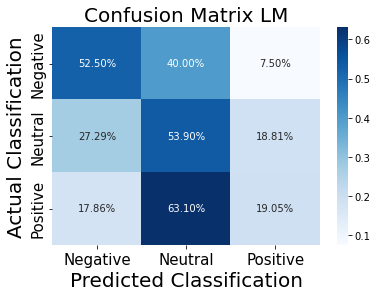

In [15]:
def graph(data):
    confusion_matrix1 =confusion_matrix(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix LM',fontsize=20)
    ax.set_xlabel('Predicted Classification',fontsize=20)
    ax.set_ylabel('Actual Classification',fontsize=20)
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'],fontsize=15)
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'], fontsize=15, va='center')
    plt.savefig('lm_mda_final',bbox_inches="tight")
    plt.show()
graph(data)

In [16]:
def harvard_calculation(data):
    length=[]
    positive_HIV4=[]
    negative_HIV4=[]
    HIV4=ps.HIV4()
    for i in data['tokenized_text']:
        tokens=HIV4.tokenize(i)
        positive_HIV4.append(HIV4.get_score(tokens)['Positive'])
        negative_HIV4.append(HIV4.get_score(tokens)['Negative'])
    data['positive_HIV4'] =positive_HIV4
    data['negative_HIV4'] =negative_HIV4
harvard_calculation(data)    

In [17]:
def HIV4_classification(data):
    data['classification_HIV4']='positive'
    data.loc[data['positive_HIV4'] < data['negative_HIV4'], 'classification_HIV4'] ='negative'
    data.loc[data['negative_HIV4'] == data['positive_HIV4'],'classification_HIV4']='neutral'

HIV4_classification(data) 

In [18]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_HIV4'], average='weighted')
print(f1_score(data))

0.22512832073420602


In [19]:
def accuracy_HIV4(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_HIV4'])
print(accuracy_HIV4(data))

0.22666666666666666


In [20]:
def confusion_matrix_HIV4(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_HIV4'])
confusion_matrix_HIV4(data)

array([[ 21,  18,  41],
       [ 54,  58, 324],
       [ 13,  14,  57]], dtype=int64)

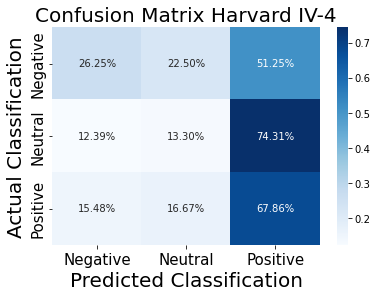

In [22]:
def graph(data):
    confusion_matrix1 =confusion_matrix_HIV4(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix Harvard IV-4',fontsize=20)
    ax.set_xlabel('Predicted Classification',fontsize=20)
    ax.set_ylabel('Actual Classification',fontsize=20)
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'],fontsize=15)
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'], fontsize=15, va='center')
    plt.savefig('harvard_mda_final',bbox_inches="tight")
    plt.show()
graph(data)

In [23]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


In [24]:
labels={0:'neutral', 1:'positive',2:'negative'}
def classification_fin(data):
    classification_finbert=[]
    for i in data['tokenized_text']:
        inputs=tokenizer(i, return_tensors='pt', padding=True)
        outputs = finbert(**inputs)[0]
        classification_finbert.append(labels[np.argmax(outputs.detach().numpy())])
    data['classification_finbert']=classification_finbert
classification_fin(data)

In [25]:
def accuracy_fin(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_finbert'])
print(accuracy_fin(data)) 

0.7833333333333333


In [26]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_finbert'], average='weighted')
print(f1_score(data))

0.7802507228299417


In [27]:
def confusion_matrix_fin(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_finbert'])
confusion_matrix_fin(data)

array([[ 40,  37,   3],
       [ 32, 380,  24],
       [  2,  32,  50]], dtype=int64)

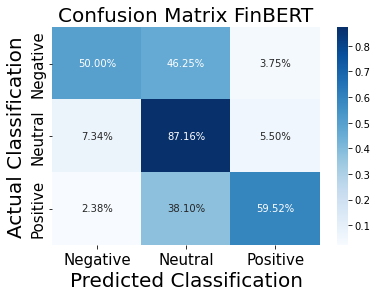

In [29]:
def graph(data):
    confusion_matrix1 =confusion_matrix_fin(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix FinBERT',fontsize=20)
    ax.set_xlabel('Predicted Classification',fontsize=20)
    ax.set_ylabel('Actual Classification',fontsize=20)
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'],fontsize=15)
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'], fontsize=15, va='center')
    plt.savefig('FinBERT_mda_final',bbox_inches="tight")
    plt.show()
graph(data)

In [30]:
os.chdir('C:/Program Files/Java/jre1.8.0_331/bin')

In [31]:
DPATH="C:/Users/Mia/Downloads/stanford-corenlp-4.4.0"
!java -mx6g -cp "$DPATH/*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000

[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - Server default properties:
			(Note: unspecified annotator properties are English defaults)
			inputFormat = text
			outputFormat = json
			prettyPrint = false
[main] INFO CoreNLP - Threads: 8
[main] INFO CoreNLP - Starting server...
[main] WARN CoreNLP - java.net.BindException: Address already in use: bind
  sun.nio.ch.Net.bind0(Native Method)
  sun.nio.ch.Net.bind(Unknown Source)
  sun.nio.ch.Net.bind(Unknown Source)
  sun.nio.ch.ServerSocketChannelImpl.bind(Unknown Source)
  sun.nio.ch.ServerSocketAdaptor.bind(Unknown Source)
  sun.net.httpserver.ServerImpl.<init>(Unknown Source)
  sun.net.httpserver.HttpServerImpl.<init>(Unknown Source)
  sun.net.httpserver.DefaultHttpServerProvider.createHttpServer(Unknown Source)
  com.sun.net.httpserver.HttpServer.create(Unknown Source)
  edu.stanford.nlp.pipeline.StanfordCoreNLPServer.run(StanfordCoreNLPServer.java:1534)
  edu.stanford.nlp.pipeline.StanfordC

In [32]:
nlp = StanfordCoreNLP('http://localhost:9000')

In [38]:
os.chdir('C:/Users/Mia/Downloads')
data

,Unnamed: 0,tokenized_text,label,wordcount,positive_lm,negative_lm,classification_lm,positive_HIV4,negative_HIV4,classification_HIV4,classification_finbert,classification_RNN
0,0,results from the foodservice businesses in ref...,positive,46,0,1,negative,3,1,positive,positive,negative
1,1,during a portion of what was previously ...,neutral,33,0,0,neutral,4,0,positive,neutral,neutral
4,4,the increased fourth quarter demand for retail...,positive,29,0,0,neutral,3,3,neutral,positive,negative
5,5,contractual cash obligations as of december ...,neutral,24,0,0,neutral,2,1,positive,neutral,negative
6,6,our actual results could differ materially fro...,neutral,34,0,0,neutral,3,1,positive,negative,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,costs associated with intangibles that have no...,neutral,19,0,0,neutral,1,1,neutral,neutral,negative
656,656,we define ebitda as operating profit plus depr...,neutral,16,1,1,neutral,3,3,neutral,neutral,positive
657,657,it is not possible to estimate what effect thi...,neutral,23,2,1,positive,3,1,positive,neutral,negative
658,658,for additional information on mortgage banking...,positive,46,1,0,positive,3,0,positive,positive,neutral


In [34]:
classification_RNN=[]
def RNN_classification(data):
    for i in data['tokenized_text']:
            result= nlp.annotate(i,
                                properties={'annotators': 'sentiment',
                                           'outputFormat':'json','timeout':40000})
            classification_RNN.append(result['sentences'][0]['sentiment'])
    data['classification_RNN']=classification_RNN
    data['classification_RNN']=data['classification_RNN'].str.lower()
RNN_classification(data)

In [41]:
data.loc[(data['classification_RNN'] == 'verypositive')] = 'positive'
data.loc[(data['classification_RNN'] == 'verynegative')] = 'negative'

In [42]:
data['classification_RNN'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [43]:
def accuracy_RNN(data):
    return sklearn.metrics.accuracy_score(data['label'], data['classification_RNN'])
print(accuracy_RNN(data))

0.42833333333333334


In [44]:
def f1_score(data):
    return sklearn.metrics.f1_score(data['label'], data['classification_RNN'], average='weighted')
print(f1_score(data))

0.4747171932779816


In [45]:
def confusion_matrix_fin(data):
    return sklearn.metrics.confusion_matrix(data['label'], data['classification_RNN'])
confusion_matrix_fin(data)

array([[ 40,  26,  15],
       [142, 191, 101],
       [ 28,  31,  26]], dtype=int64)

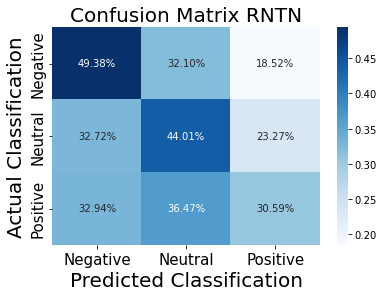

In [47]:
def graph(data):
    confusion_matrix1 =confusion_matrix_fin(data)
    confusion_matrix1=confusion_matrix1.astype('float')/confusion_matrix1.sum(axis=1)[:,np.newaxis]
    ax = sns.heatmap(confusion_matrix1, annot =True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix RNTN',fontsize=20)
    ax.set_xlabel('Predicted Classification',fontsize=20)
    ax.set_ylabel('Actual Classification',fontsize=20)
    ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'],fontsize=15)
    ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'], fontsize=15, va='center')
    plt.savefig('RNTN_mda_final',bbox_inches="tight")
    plt.show()
graph(data)